In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Student Enrolment Status
`Multi-Class classification Problem`

## STEP 1 : Look at the big picture

This is a supervised learning problem that involves multi-class classification. The objective is to classify students into one of three categories: dropout, enrolled, or graduate, based on their status at the end of the normal duration of the course. The dataset assigns numerical codes 0, 1, and 2 to represent each class.

## STEP 2 : Get the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("/content/Train-Kaggle-Students_Enrolment_Status.csv")
df_test = pd.read_csv("/content/Test-Kaggle-Students_Enrolment_Status.csv")

In [4]:
#df_train = pd.read_csv("../input/students-drop-out-prediction/train.csv")
#df_test = pd.read_csv("../input/students-drop-out-prediction/test.csv")

### Check data samples

In [5]:
df_train.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


In [6]:
df_test.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,9,90,15,121,1,8,23,114,256,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,1,7,123,14,126,1,5,19,3,40,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,2,3,6,10,102,1,1,16,181,168,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,3,6,10,148,1,1,16,110,278,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,4,3,6,10,148,1,1,16,1,168,...,7.6,2.6,0.32,7,97,25,30,18,52,0


In [7]:
print(df_train.shape, df_test.shape)

(3796, 43) (1628, 42)


### Features

#### train data

In [8]:
df_train = df_train.drop(columns='id', axis=1)
df_train


,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,3,6,11,55,1,1,16,5,60,30,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,8,94,12,65,1,4,22,4,173,199,...,5.4,6.51,6,29,37,25,53,35,7,2
2,3,166,10,155,1,1,16,1,309,30,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,6,13,121,1,1,16,1,6,23,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,51,18,21,1,17,22,118,168,106,...,8.4,12.51,16,22,25,25,24,23,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,3,89,13,102,1,1,16,1,6,23,...,2.6,0.32,7,77,42,38,12,24,5,2
3792,7,8,20,130,1,1,25,6,10,29,...,8.5,3.79,13,75,18,35,63,78,6,2
3793,5,168,14,59,1,15,23,1,174,28,...,1.4,3.51,12,56,13,34,12,79,6,0
3794,4,89,19,122,1,9,17,189,256,105,...,4.3,8.08,10,55,36,21,48,76,6,1


#### test data

In [9]:
df_test_copy = df_test.copy()
df_test_copy = df_test_copy.drop(columns='id', axis=1)
df_test_copy


,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,9,90,15,121,1,8,23,114,256,108,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,7,123,14,126,1,5,19,3,40,261,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,3,6,10,102,1,1,16,181,168,103,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,6,10,148,1,1,16,110,278,103,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,3,6,10,148,1,1,16,1,168,12,...,7.6,2.6,0.32,7,97,25,30,18,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,4,147,10,167,0,1,16,181,251,103,...,9.4,-0.8,-3.12,4,6,46,1,13,21,5
1624,3,6,14,121,1,1,16,183,278,103,...,10.8,1.4,1.74,1,96,28,15,59,65,0
1625,3,116,10,167,0,1,16,181,251,103,...,12.7,3.7,-1.70,9,98,27,33,42,33,0
1626,3,6,10,76,1,1,16,5,60,11,...,11.1,0.6,2.02,5,42,45,16,55,6,2


In [10]:
df_train.shape, df_test.shape

((3796, 42), (1628, 42))

In [11]:

feature_names = df_train.columns[:-1].values
label = [df_train.columns[-1]]

print("Feature names: ", feature_names)
print("Label: ", label)

Feature names:  ['v_21' 'v_32' 'v_15' 'v_4' 'v_1' 'v_8' 'v_12' 'v_25' 'v_20' 'v_18' 'v_3'
 'v_11' 'v_14' 'v_26' 'v_27' 'v_30' 'v_9' 'v_31' 'v_28' 'v_13' 'v_33'
 'v_17' 'v_19' 'v_29' 'v_23' 'v_24' 'v_10' 'v_5' 'v_6' 'v_22' 'v_0' 'v_7'
 'v_2' 'v_16' 'v_34' 'v_35' 'v_36' 'v_37' 'v_38' 'v_39' 'v_40']
Label:  ['label']


In [12]:
df_train

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,3,6,11,55,1,1,16,5,60,30,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,8,94,12,65,1,4,22,4,173,199,...,5.4,6.51,6,29,37,25,53,35,7,2
2,3,166,10,155,1,1,16,1,309,30,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,6,13,121,1,1,16,1,6,23,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,51,18,21,1,17,22,118,168,106,...,8.4,12.51,16,22,25,25,24,23,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,3,89,13,102,1,1,16,1,6,23,...,2.6,0.32,7,77,42,38,12,24,5,2
3792,7,8,20,130,1,1,25,6,10,29,...,8.5,3.79,13,75,18,35,63,78,6,2
3793,5,168,14,59,1,15,23,1,174,28,...,1.4,3.51,12,56,13,34,12,79,6,0
3794,4,89,19,122,1,9,17,189,256,105,...,4.3,8.08,10,55,36,21,48,76,6,1


### Data statistics

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_21    3796 non-null   int64  
 1   v_32    3796 non-null   int64  
 2   v_15    3796 non-null   int64  
 3   v_4     3796 non-null   int64  
 4   v_1     3796 non-null   int64  
 5   v_8     3796 non-null   int64  
 6   v_12    3796 non-null   int64  
 7   v_25    3796 non-null   int64  
 8   v_20    3796 non-null   int64  
 9   v_18    3796 non-null   int64  
 10  v_3     3796 non-null   int64  
 11  v_11    3796 non-null   int64  
 12  v_14    3796 non-null   int64  
 13  v_26    3796 non-null   int64  
 14  v_27    3796 non-null   int64  
 15  v_30    3796 non-null   int64  
 16  v_9     3796 non-null   int64  
 17  v_31    3796 non-null   int64  
 18  v_28    3796 non-null   int64  
 19  v_13    3796 non-null   int64  
 20  v_33    3796 non-null   int64  
 21  v_17    3796 non-null   int64  
 22  

In [14]:
df_train.describe()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,...,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000
mean,4.817439,70.825606,11.609062,99.329294,0.911486,3.436249,18.970495,97.203372,166.138567,57.441254,...,2.041333,0.835901,5.341149,50.674658,26.212065,20.837197,31.276607,40.210485,3.278978,0.85432
std,6.166860,56.110329,2.576362,45.017380,0.284079,4.577644,15.010042,79.213308,103.121322,50.416264,...,2.516779,3.109413,3.507388,29.330820,14.929649,11.984063,17.847942,22.466458,2.618851,0.69866
min,3.000000,6.000000,9.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,3.000000,...,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,6.000000,10.000000,55.000000,1.000000,1.000000,16.000000,5.000000,60.000000,23.000000,...,0.500000,-1.700000,3.000000,25.000000,13.000000,11.000000,16.000000,21.750000,1.000000,0.00000
50%,3.000000,89.000000,10.000000,101.000000,1.000000,1.000000,16.000000,110.000000,168.000000,30.000000,...,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,31.000000,41.000000,3.000000,1.00000
75%,4.000000,116.000000,12.000000,146.000000,1.000000,3.000000,16.000000,181.000000,251.000000,103.000000,...,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.000000,5.000000,1.00000
max,61.000000,176.000000,25.000000,176.000000,1.000000,25.000000,179.000000,289.000000,322.000000,324.000000,...,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000,2.00000


In [15]:
df_train['label'].value_counts()

1    1863
0    1243
2     690
Name: label, dtype: int64

Text(0, 0.5, 'Count')

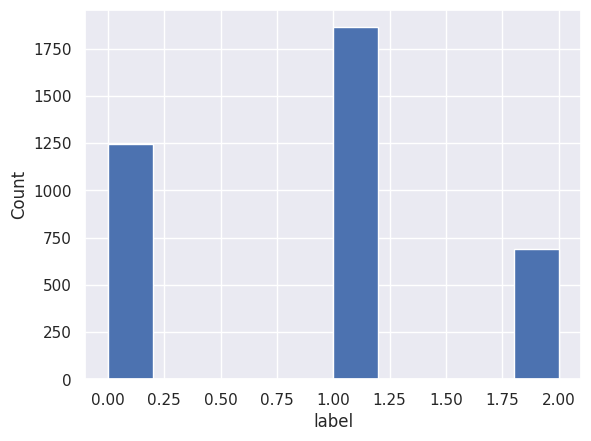

In [16]:
sns.set()
df_train.label.hist()
plt.xlabel('label')
plt.ylabel('Count')

## STEP 3 : Data Visualization

In [17]:
exploration_set = df_train.copy()

### Scatter Visualization

In [18]:
#sns.scatterplot(hue='label', data=exploration_set)

### Correlation matrix

In [19]:
# corr funcn to calculate correlation
corr_matrix = exploration_set.corr() 

In [20]:
corr_matrix

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
v_21,1.000000,0.125341,0.152866,0.010845,-0.082628,0.173957,0.005009,0.092436,0.063321,0.045850,...,0.183248,0.142946,0.110635,0.028021,0.067447,0.045596,-0.004181,0.025268,0.144173,-0.042747
v_32,0.125341,1.000000,-0.101544,-0.067567,-0.212189,0.393977,0.014708,0.083641,0.059108,0.022664,...,0.023755,-0.009407,0.015609,0.022991,0.020092,-0.010007,-0.027519,-0.015308,0.021466,-0.099336
v_15,0.152866,-0.101544,1.000000,0.106427,0.174848,0.201274,0.049423,-0.047147,0.000466,-0.025334,...,0.474845,0.401445,0.323370,0.044105,0.097907,0.113922,0.068093,0.048563,0.433270,0.012123
v_4,0.010845,-0.067567,0.106427,1.000000,-0.002542,-0.125510,-0.003023,0.060290,0.054272,0.014412,...,0.048838,0.031829,0.010628,0.003208,-0.000046,0.000271,-0.011523,0.003588,0.024381,-0.019453
v_1,-0.082628,-0.212189,0.174848,-0.002542,1.000000,-0.026630,0.032820,-0.176909,-0.109221,-0.053203,...,0.082110,0.086177,0.040628,-0.012059,-0.004333,0.050875,0.024371,0.010517,0.100143,0.055830
v_8,0.173957,0.393977,0.201274,-0.125510,-0.026630,1.000000,0.003459,0.014339,0.007621,0.003934,...,0.240558,0.263777,0.155882,0.056562,0.045777,0.035110,0.028536,0.008244,0.259127,-0.057983
v_12,0.005009,0.014708,0.049423,-0.003023,0.032820,0.003459,1.000000,-0.045093,-0.105872,0.043391,...,0.059112,0.087043,0.058046,0.014360,0.038833,0.005084,0.000683,0.002359,0.054105,0.010495
v_25,0.092436,0.083641,-0.047147,0.060290,-0.176909,0.014339,-0.045093,1.000000,0.515615,0.326622,...,0.032589,-0.056755,0.034691,-0.017550,0.013377,-0.002311,-0.029371,0.007368,-0.008876,-0.076107
v_20,0.063321,0.059108,0.000466,0.054272,-0.109221,0.007621,-0.105872,0.515615,1.000000,0.210192,...,0.049958,-0.032540,0.023913,0.011808,0.014547,0.003604,-0.001166,0.009233,-0.015489,-0.045745
v_18,0.045850,0.022664,-0.025334,0.014412,-0.053203,0.003934,0.043391,0.326622,0.210192,1.000000,...,0.017027,0.065337,0.023414,-0.004440,0.005139,0.013721,-0.010235,0.012098,-0.008814,0.041063


In [21]:
corr_matrix['label']

v_21    -0.042747
v_32    -0.099336
v_15     0.012123
v_4     -0.019453
v_1      0.055830
v_8     -0.057983
v_12     0.010495
v_25    -0.076107
v_20    -0.045745
v_18     0.041063
v_3      0.064006
v_11     0.047513
v_14    -0.012573
v_26    -0.102939
v_27     0.225127
v_30    -0.113133
v_9      0.064009
v_31    -0.198527
v_28     0.002742
v_13    -0.006180
v_33     0.029574
v_17     0.098969
v_19     0.215180
v_29     0.293508
v_23    -0.019353
v_24    -0.030006
v_10     0.029318
v_5      0.147685
v_6      0.278750
v_22     0.368522
v_0     -0.035275
v_7     -0.041763
v_2     -0.045008
v_16     0.023932
v_34    -0.017565
v_35     0.006083
v_36     0.013118
v_37    -0.004187
v_38    -0.005791
v_39    -0.007229
v_40    -0.003273
label    1.000000
Name: label, dtype: float64

#### Correlation matrix with heatmap

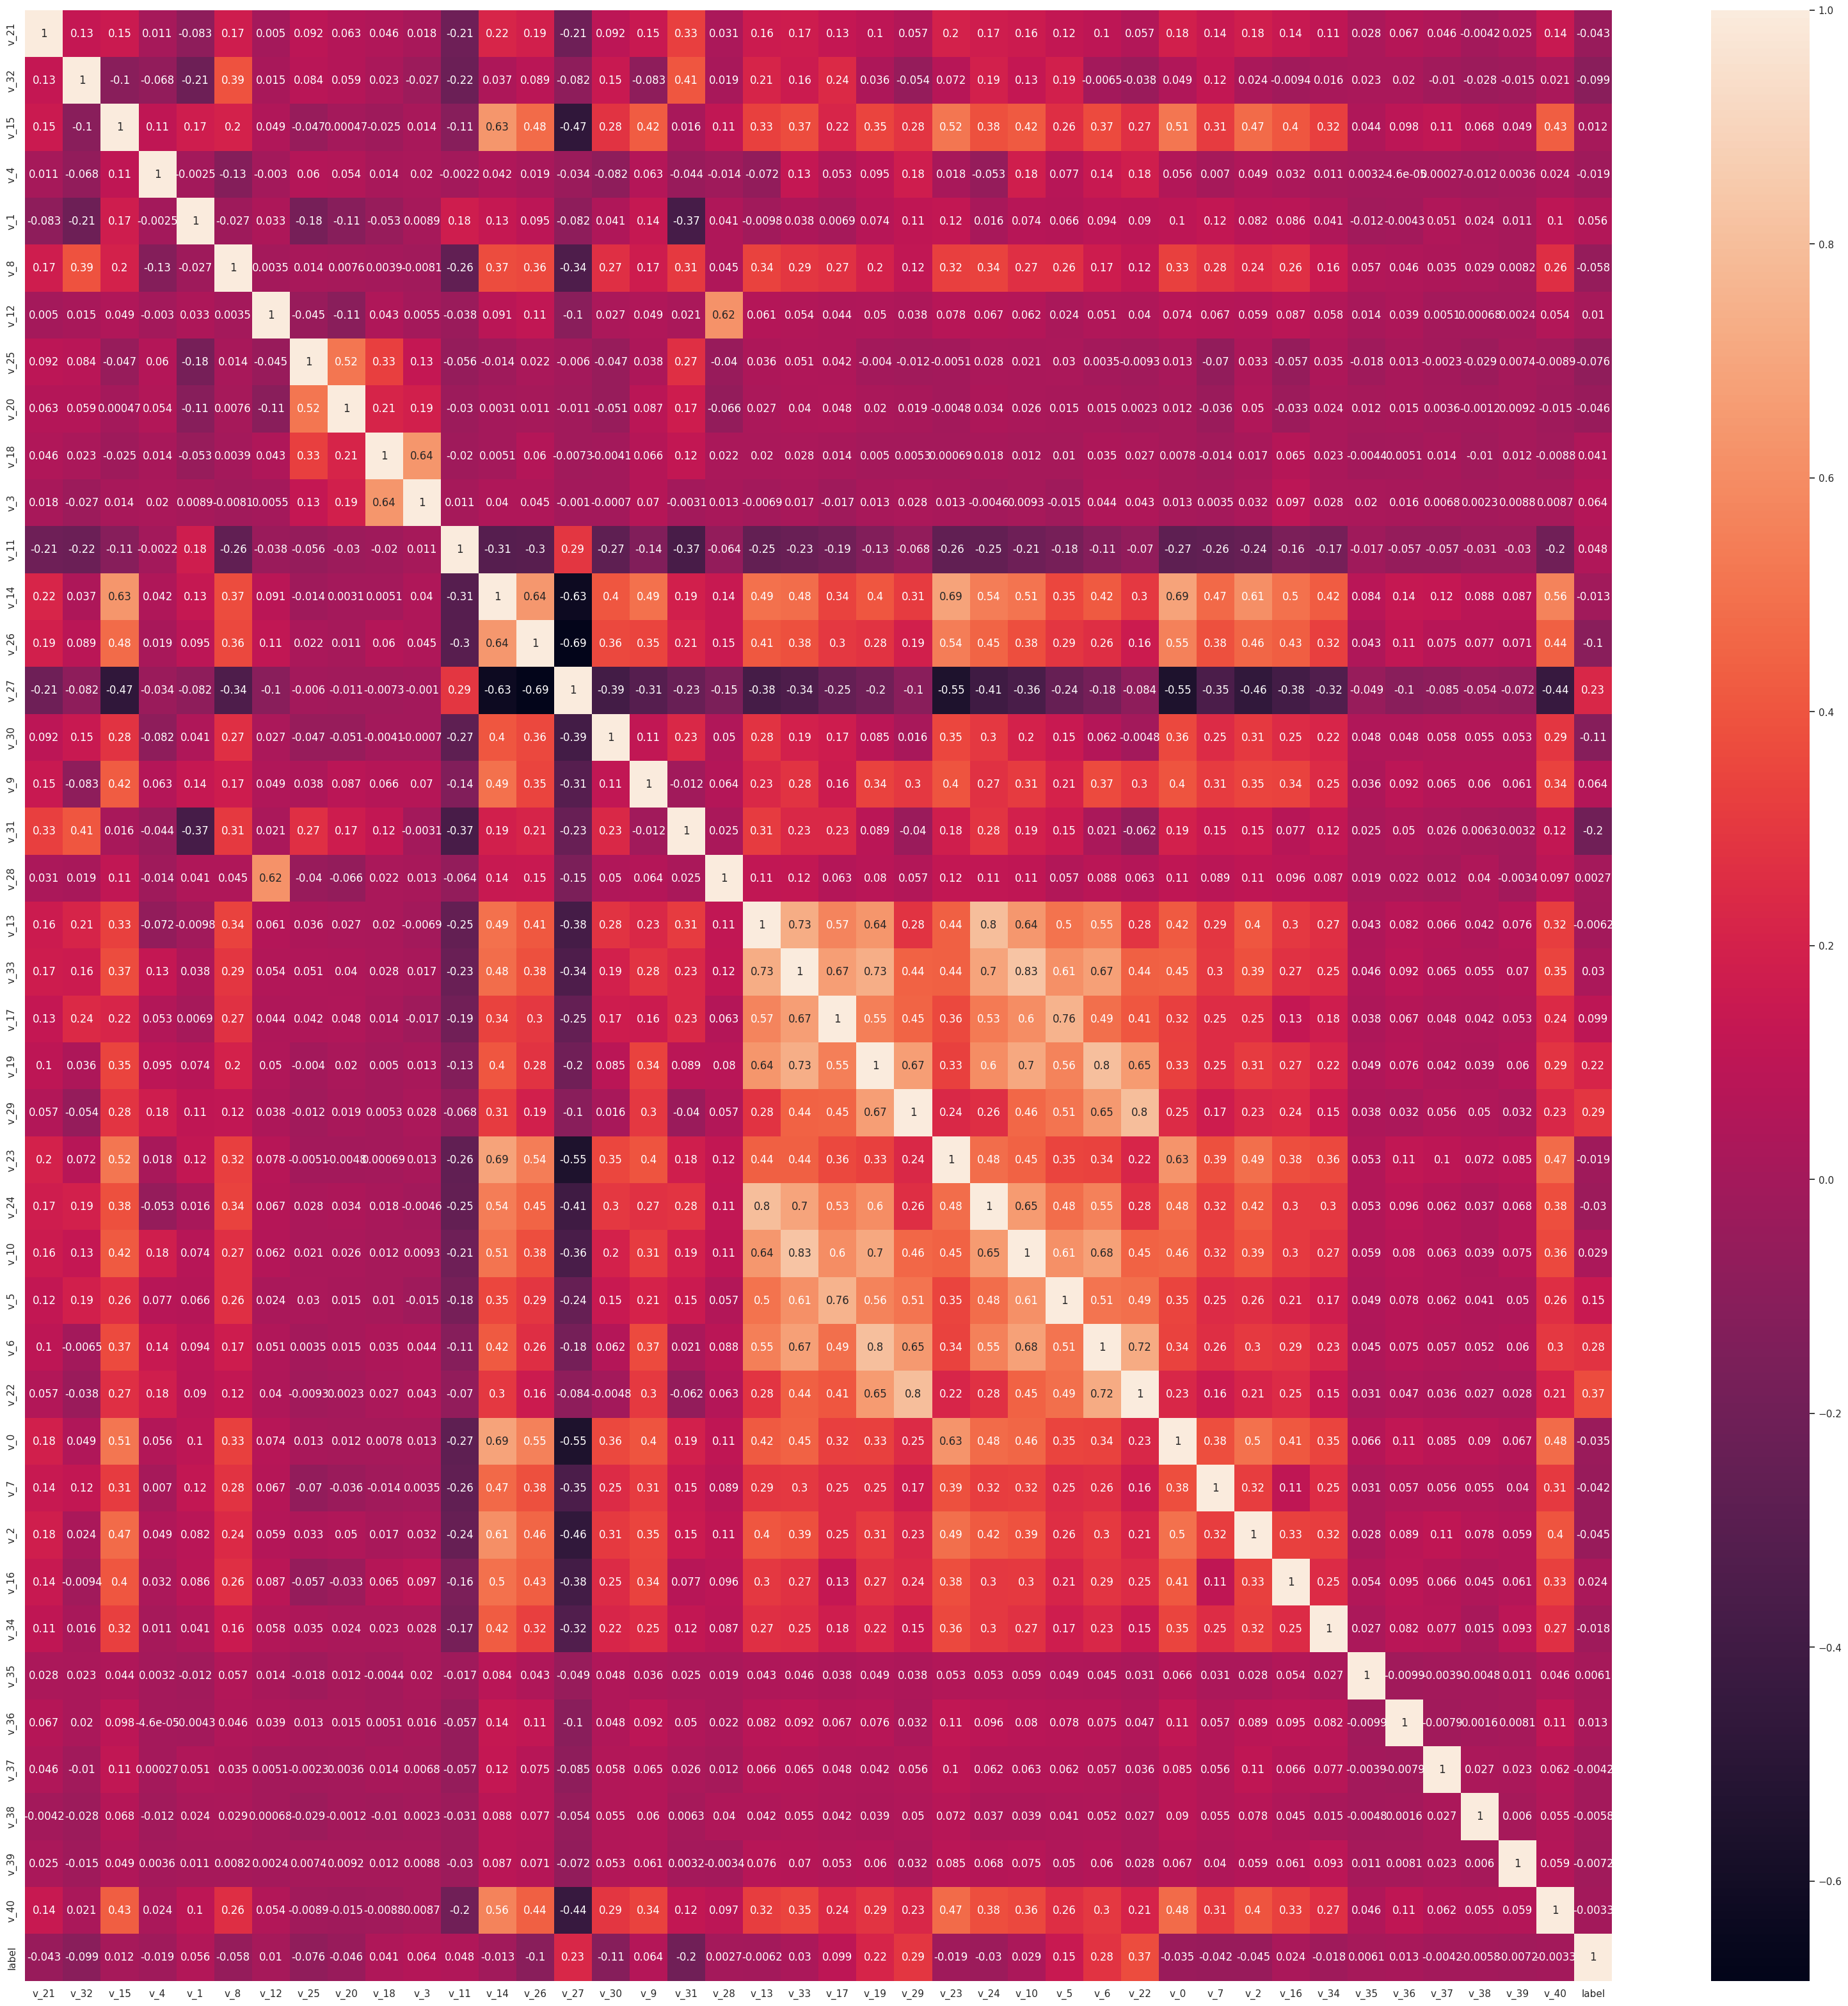

In [22]:
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True);

## STEP 4 : Prepare the data for ML algo

### Separate features and labels form the training set

In [23]:
# copying all features leaving aside the label.
enroll_features = df_train.drop("label", axis=1)

# copy the label list
enroll_labels = df_train['label']

### Separate features and labels from strat test set

In [24]:

test_enroll_features = df_test_copy


In [25]:
test_enroll_features.shape

(1628, 41)

### Data Cleaning

In [26]:
'''Counts the no. of NaN in each column of wine_feature'''
enroll_features.isna().sum()

v_21    0
v_32    0
v_15    0
v_4     0
v_1     0
v_8     0
v_12    0
v_25    0
v_20    0
v_18    0
v_3     0
v_11    0
v_14    0
v_26    0
v_27    0
v_30    0
v_9     0
v_31    0
v_28    0
v_13    0
v_33    0
v_17    0
v_19    0
v_29    0
v_23    0
v_24    0
v_10    0
v_5     0
v_6     0
v_22    0
v_0     0
v_7     0
v_2     0
v_16    0
v_34    0
v_35    0
v_36    0
v_37    0
v_38    0
v_39    0
v_40    0
dtype: int64

Since, not any features have missing values, so we are not going to take help of imputer 

In [27]:
enroll_features.median()

v_21      3.00
v_32     89.00
v_15     10.00
v_4     101.00
v_1       1.00
v_8       1.00
v_12     16.00
v_25    110.00
v_20    168.00
v_18     30.00
v_3      70.00
v_11      0.00
v_14      0.00
v_26      0.00
v_27      1.00
v_30      0.00
v_9       0.00
v_31     29.00
v_28      0.00
v_13     14.00
v_33     29.00
v_17     49.00
v_19     24.00
v_29     18.00
v_23      3.00
v_24     15.00
v_10     25.00
v_5      39.00
v_6      13.00
v_22     25.00
v_0      12.00
v_7      12.40
v_2       1.40
v_16      0.79
v_34      5.00
v_35     50.00
v_36     26.00
v_37     21.00
v_38     31.00
v_39     41.00
v_40      3.00
dtype: float64

### Data Preprocessing

In [28]:
from sklearn.preprocessing import MinMaxScaler,\
    StandardScaler, MaxAbsScaler, LabelBinarizer
from sklearn.pipeline import Pipeline

In [29]:
enroll_features = StandardScaler().fit_transform(enroll_features)

In [30]:
test_enroll_features = StandardScaler().fit_transform(test_enroll_features)

In [31]:
enroll_features

array([[-0.29474947, -1.15547613, -0.2364351 , ...,  0.93711624,
        -0.63260337, -1.25223212],
       [ 0.51614268,  0.41306917,  0.15176025, ...,  1.2172975 ,
        -0.2319534 ,  1.42104754],
       [-0.29474947,  1.69642442, -0.62463045, ...,  0.65693499,
        -0.09840341, -0.48843793],
       ...,
       [ 0.02960739,  1.73207318,  0.92815094, ..., -1.08018878,
         1.72677981,  1.03915044],
       [-0.13257104,  0.32394728,  2.86912768, ...,  0.93711624,
         1.59322982,  1.03915044],
       [-0.29474947, -1.15547613, -0.62463045, ...,  0.60089874,
         0.25772991,  0.65725335]])

In [32]:
test_enroll_features

array([[ 0.64638235,  0.33455386,  1.46814858, ..., -0.40397071,
         1.39112375,  0.65386136],
       [ 0.33155499,  0.9186234 ,  1.05276   , ..., -0.18082564,
         1.17154362,  3.26198321],
       [-0.29809974, -1.15216859, -0.60879432, ...,  1.32540362,
        -0.76076153,  0.28127253],
       ...,
       [-0.29809974,  0.79472986, -0.60879432, ...,  0.65596839,
        -0.32160127, -1.20908281],
       [-0.29809974, -1.15216859, -0.60879432, ...,  1.38118989,
        -1.50733397, -0.46390514],
       [-0.29809974,  0.36995202, -0.60879432, ..., -1.18497848,
        -1.46341794, -0.09131631]])

In [33]:
# enroll_labels = LabelBinarizer().fit_transform(enroll_labels)

In [34]:
# enroll_labels

In [35]:
# test_enroll_features=StandardScaler.fit_transform(test_enroll_features)

## STEP 5 : Selection and training of ML models 

In [36]:
''' Imports '''
#Visualizing the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay,\
   confusion_matrix, precision_recall_curve,\
   precision_score, recall_score,\
   classification_report, make_scorer

from sklearn.model_selection import cross_validate,\
  cross_val_predict, GridSearchCV, cross_val_score


Polynomial regression/Logistic regression with cross validation.

### Baseline Model 
A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models.

Baseline models usually lack complexity and may have little predictive power. Regardless, their inclusion is a necessity for many reasons.

There is a very strong case for building baseline models prior to any other model.

Baseline models are not only very easy to build, but they also provide a lot of information that can dictate the future steps in a machine learning project.

### Logistic Regression Model

In [37]:
# '''Imports'''
# from sklearn.linear_model import LogisticRegression

# np.random.seed(42)

# lr=LogisticRegression(random_state=1729,multi_class='multinomial')
# lr.fit(enroll_features, enroll_labels)
# lr.score(enroll_features, enroll_labels)

In [38]:
# pred_enroll_labels = lr.predict(enroll_features)

In [39]:
# '''Confusion matrix'''
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [40]:
# print(classification_report(enroll_labels, pred_enroll_labels))

In [41]:
# acc = cross_val_score(estimator=lr, X=enroll_features, y=enroll_labels, cv=10)
# print(type(acc))
# print('Accuracy of each fold ', list(acc*100))
# print('Accuracy: {:.2f} %'.format(acc.mean()*100))

### Perceptron

In [42]:
# '''Imports'''


# from sklearn.linear_model import Perceptron

# from sklearn.metrics import ConfusionMatrixDisplay,\
#    confusion_matrix, precision_recall_curve,\
#    precision_score, recall_score,\
#    classification_report, make_scorer

# from sklearn.model_selection import cross_validate,\
#   cross_val_predict, GridSearchCV

In [43]:
# percep = Perceptron(random_state = 1729)

In [44]:
# percep.fit(enroll_features, enroll_labels)
# percep.score(enroll_features, enroll_labels)

In [45]:
# pred_enroll_labels = percep.predict(enroll_features)

In [46]:
'''Confusion matrix'''
# ConfusionMatrixDisplay.from_predictions(enroll_labels, pred_enroll_labels);

'Confusion matrix'

In [47]:
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [48]:
# print(classification_report(enroll_labels, pred_enroll_labels))

In [49]:
# from sklearn.model_selection import cross_val_score
# acc = cross_val_score(estimator=percep, X=enroll_features, y=enroll_labels, cv=10)
# print(type(acc))
# print('Accuracy of each fold ', list(acc*100))
# print('Accuracy: {:.2f} %'.format(acc.mean()*100))

### DecisionTreeClassifier

In [50]:
# from sklearn.tree import DecisionTreeClassifier

In [51]:
# DTC = DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
# DTC.fit(enroll_features, enroll_labels)

In [53]:
# print("model score: %.3f" % DTC.score(enroll_features, enroll_labels))

In [54]:
# pred_enroll_labels = DTC.predict(enroll_features)

In [55]:
# '''Confusion matrix'''
# ConfusionMatrixDisplay.from_predictions(enroll_labels, pred_enroll_labels)

In [56]:
# print(classification_report(enroll_labels, pred_enroll_labels))

In [57]:
# from sklearn.model_selection import cross_val_score
# acc = cross_val_score(estimator=DTC, X=enroll_features, y=enroll_labels, cv=10)
# print(type(acc))
# print('Accuracy of each fold ', list(acc*100))
# print('Accuracy: {:.2f} %'.format(acc.mean()*100))

### KNN

In [58]:
# '''Imports'''
# from sklearn.neighbors import KNeighborsClassifier

# np.random.seed(42)
# knn = GridSearchCV(KNeighborsClassifier(algorithm='auto'),\
#                    {'n_neighbors':[2,4,5],\
#                     'weights':['uniform', 'distance'],\
#                    'metric':['euclidean', 'manhattan']},cv=5)
# knn.fit(enroll_features, enroll_labels)
# knn.score(enroll_features, enroll_labels)

In [59]:
# tuned_knn = KNeighborsClassifier(n_neighbors=3)

In [60]:
# tuned_knn.fit(enroll_features, enroll_labels)

In [61]:
# print("Model score: %.3f" % tuned_knn.score(enroll_features, enroll_labels))


In [62]:
# pred_enroll_labels = tuned_knn.predict(enroll_features)

In [63]:
# tuned_knn.classes_

In [64]:
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [65]:
# print(classification_report(enroll_labels, pred_enroll_labels))

### SVM

In [66]:
# '''Imports'''
# from sklearn.svm import SVC
# np.random.seed(42)
# GS=GridSearchCV(SVC(), {'kernel':['linear', 'rbf'],\
#                         'C':[0.1, 1, 30]},cv=10)
# GS.fit(enroll_features, enroll_labels)
# GS.best_params_

In [67]:
# from sklearn.svm import SVC
# np.random.seed(42)

# tuned_svc=SVC(C=1, kernel='rbf')
# tuned_svc.fit(enroll_features, enroll_labels)
# tuned_svc.score(enroll_features, enroll_labels)

In [68]:
# tuned_svc30=SVC(C=30, kernel='rbf')
# tuned_svc30.fit(enroll_features, enroll_labels)
# tuned_svc30.score(enroll_features, enroll_labels)

In [69]:
# pred_enroll_labels = tuned_svc.predict(test_enroll_features)

In [70]:
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [71]:
# print(classification_report(enroll_labels, pred_enroll_labels))

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(enroll_features, enroll_labels)
rfc.score(enroll_features, enroll_labels)
# scores = cross_val_score(rfc_cv, enroll_features, enroll_labels, cv=10, scoring = "accuracy")
# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())


1.0

#### Hyperparameter tuning

In [73]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}



In [74]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(enroll_features, enroll_labels)

In [75]:
# rf_random.best_params_

In [76]:
tuned_rfc = RandomForestClassifier(n_estimators=800,
                             min_samples_split=5,
                             min_samples_leaf= 4,
                             max_features='sqrt',
                             max_depth=30,
                             bootstrap=False, random_state=42)
tuned_rfc.fit(enroll_features, enroll_labels)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=800, random_state=42)

In [77]:
tuned_rfc.score(enroll_features, enroll_labels)

0.9707586933614331

In [78]:
pred_enroll_labels = tuned_rfc.predict(enroll_features)

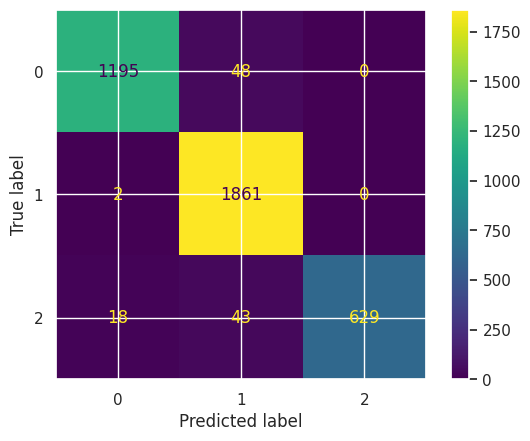

In [79]:
cm = confusion_matrix(enroll_labels, pred_enroll_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.plot('Confusion matrix');

In [80]:
print(classification_report(enroll_labels, pred_enroll_labels))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1243
           1       0.95      1.00      0.98      1863
           2       1.00      0.91      0.95       690

    accuracy                           0.97      3796
   macro avg       0.98      0.96      0.97      3796
weighted avg       0.97      0.97      0.97      3796



### Bagging

In [81]:
# '''Imports'''
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# bc=BaggingClassifier(base_estimator=RandomForestClassifier())
# bc.fit(enroll_features, enroll_labels)
# bc.score(enroll_features, enroll_labels)

In [82]:
# pred_enroll_labels = bc.predict(enroll_features)

In [83]:
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [84]:
# print(classification_report(enroll_labels, pred_enroll_labels))

### Boosting

In [85]:
# '''Imports'''
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# abc=AdaBoostClassifier(n_estimators=50,\
#         base_estimator=RandomForestClassifier())
# abc.fit(enroll_features, enroll_labels)
# abc.score(enroll_features, enroll_labels)

In [86]:
# pred_enroll_labels = abc.predict(enroll_features)

In [87]:
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [88]:
# print(classification_report(enroll_labels, pred_enroll_labels))

In [89]:
# '''RFECV'''
# from sklearn.feature_selection import RFECV

# rfecv_abc = RFECV(abc, importance_getter='feature_importances_',\
#                   step=1, cv=5)
# rfecv_abc.fit(enroll_features, enroll_labels)
# rfecv_abc.score(enroll_features, enroll_labels)

In [90]:
# '''Sequential Feature Selector'''
# from sklearn.feature_selection import SequentialFeatureSelector

# sfs_abc = SequentialFeatureSelector(abc, n_features_to_select=5)
# sfs_abc.fit_transform(enroll_features, enroll_labels)
# sfs_abc.get_support()

In [91]:
# sfs_abc.score(enroll_features, enroll_labels)

#### Hyperparameter tuning

In [92]:
# '''Imports'''
# from sklearn.model_selection import RepeatedStratifiedKFold
# '''Hyperparameters Grid Search'''
# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# # define the evaluation procedure
# cv=RepeatedStratifiedKFold(n_splits=10,\
#                            n_repeats=3, random_state=1)

# # define the grid search procedure
# grid_search = GridSearchCV(estimator=abc, param_grid=grid,
#                 n_jobs=-1, cv=cv, scoring='accuracy')

# # execute the grid search
# tuned_abc = grid_search.fit(enroll_features, enroll_labels) 

# # summarize the best score and configuration
# print("Best: %f using %s" % (tuned_abc.best_score_,\
#             tuned_abc.best_params_))

# # summarize all scores that were evaluated
# means = tuned_abc.cv_results_['mean_test_score']
# stds = tuned_abc.cv_results_['std_test_score']
# params = tuned_abc.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [93]:
# pred_enroll_labels = tuned_abc.predict(enroll_features)

In [94]:
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [95]:
# print(classification_report(enroll_labels, pred_enroll_labels))

In [96]:
# '''RFECV'''
# from sklearn.feature_selection import RFECV

# rfecv_abc = RFECV(tuned_abc, step=1, cv=5)
# rfecv_abc.fit(enroll_features, enroll_labels)
# rfecv_abc.score(enroll_features, enroll_labels)

In [97]:
# pred_enroll_labels = rfecv_abc.predict(enroll_features)

# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

# print(classification_report(enroll_labels, pred_enroll_labels))

### XGB

In [98]:
# '''Imports'''
# import xgboost as xgb

# xgbc = xgb.XGBClassifier()
# xgbc.fit(enroll_features, enroll_labels)
# xgbc.score(enroll_features, enroll_labels)

In [99]:
# pred_enroll_labels = xgbc.predict(enroll_features)

In [100]:
# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

In [101]:
# print(classification_report(enroll_labels, pred_enroll_labels))

#### hyperparameter tuning

In [102]:
# # np.random.seed(42)

# tuned_xgb = GridSearchCV(xgbc,\
# {"learning_rate"    : [0.05,0.15,0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] },cv=5)
# tuned_xgb.fit(enroll_features, enroll_labels)
# tuned_xgb.score(enroll_features, enroll_labels)

In [103]:
# xgb_cv = xgb.XGBClassifier(n_estimators=100)
# scores = cross_val_score(xgb_cv, enroll_features, enroll_labels, cv=10, scoring = "accuracy")
# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())

In [104]:
# pred_enroll_labels = xgb_cv.predict(enroll_features)

# cm = confusion_matrix(enroll_labels, pred_enroll_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.plot('Confusion matrix');

# print(classification_report(enroll_labels, pred_enroll_labels))

## Sample submission

In [105]:
# test_enroll_labels=abc.predict(df_test)
# output=pd.DataFrame({'id':df_test.id, 'label':test_enroll_labels})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [106]:
test_enroll_labels = tuned_rfc.predict(test_enroll_features)
df_test['label']=test_enroll_labels
col1=df_test['id'].to_numpy()
col2=df_test['label'].to_numpy()
df=np.column_stack((col1, col2))
pd.DataFrame(df, columns=['id', 'label']).to_csv('submission.csv',index=False)
print('successful')

successful
